# 5주차 실습 

## 1st PCA를 이용해서 diabates 적용해보기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [9]:
df = pd.read_csv("/Users/user/Downloads/diabetes.csv") # \는 콜백문자 때문에 \\로 사용한다.
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

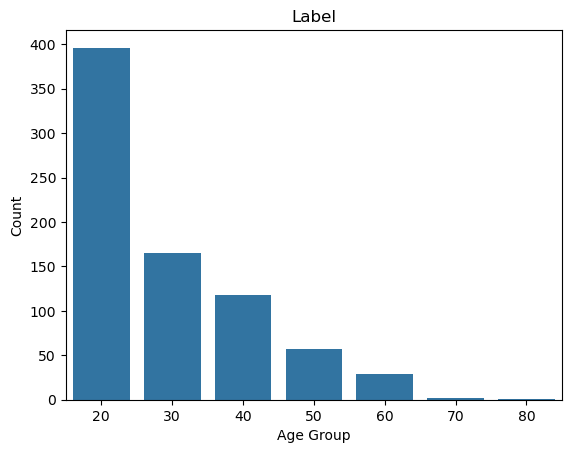

In [13]:
# Age를 10으로 나누어서 새로운 열 생성
df['Age_group'] = (df['Age'] // 10) * 10

# countplot 그리기
sns.countplot(data=df, x="Age_group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Label")


In [15]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [17]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age_group                   0
dtype: int64

In [19]:
X=df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_group
0,6,148,72,35,0,33.6,0.627,50,50
1,1,85,66,29,0,26.6,0.351,31,30
2,8,183,64,0,0,23.3,0.672,32,30
3,1,89,66,23,94,28.1,0.167,21,20
4,0,137,40,35,168,43.1,2.288,33,30


In [21]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [23]:
#one hot encoding 하기

y = pd.get_dummies(y).values
y

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

Explained variance ratio:  [0.88056348 0.06231311 0.02611672 0.01617602]
원래 데이터의 차원:  (768, 9)
차원 축소 후 데이터의 차원:  (768, 4)


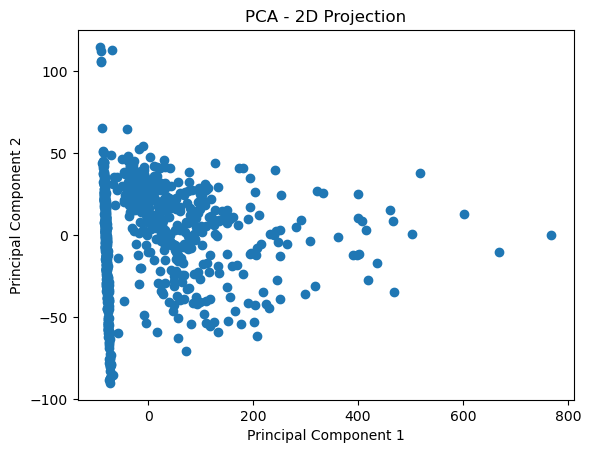

In [25]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA 객체 생성 (예: 4개의 주성분으로 차원 축소)
pca = PCA(n_components=4)
#pca = PCA(n_components=2)

# PCA 학습 및 변환
X_reduced = pca.fit_transform(X)

print("Explained variance ratio: ", pca.explained_variance_ratio_)

# 결과 확인
print("원래 데이터의 차원: ", X.shape)  
print("차원 축소 후 데이터의 차원: ", X_reduced.shape) 

# 차원 축소된 데이터 시각화
plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=20)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

array([[-89.81903574, 106.20641523, -33.46145104,  17.16154739],
       [-82.67527631,  12.40428021,  71.94211459,  10.19460517],
       [-73.86525095, -44.8899373 ,  -2.21117017, -33.89791236],
       ...,
       [-24.32762793,  15.61642706,   5.37452617, -15.54874667],
       [-81.23016049,   1.81658218,  11.68390626,  -1.75363947],
       [-76.01037589, -57.83245689,  -8.76107937,  11.5243766 ]])

In [29]:
y_train

array([[False,  True],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [ True, False],
       [False,  True]])

In [31]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(15, input_shape=(X_train.shape[1], ), activation='relu'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315 (1.23 KB)

 Trainable params: 315 (1.23 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_history=model.fit(x=X_train, y=y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6223 - loss: 2.5921 - val_accuracy: 0.6771 - val_loss: 0.6120
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.6316 - loss: 0.6097 - val_accuracy: 0.6771 - val_loss: 0.5603
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.6528 - loss: 0.5856 - val_accuracy: 0.6771 - val_loss: 0.5707
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.6418 - loss: 0.5842 - val_accuracy: 0.6771 - val_loss: 0.5619
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.6607 - loss: 0.5818 - val_accuracy: 0.6771 - val_loss: 0.5592
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6588 - loss: 0.5821 - val_accuracy: 0.6302 - val_loss: 0.5588
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.6838 - loss: 0.5788 - val_accuracy: 0.6302 - val_loss: 0.5749
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.6988 - loss: 0.5823 - val_accuracy: 0.65

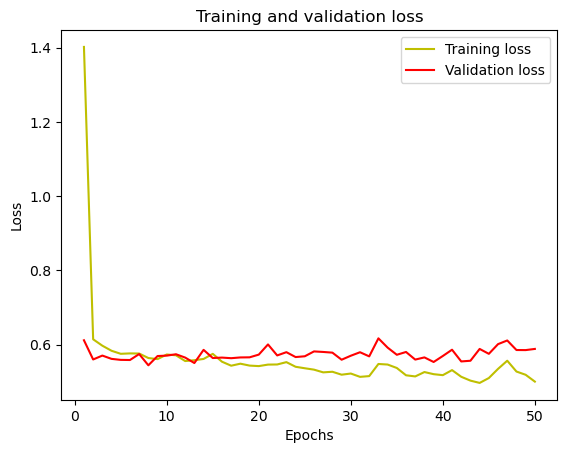

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

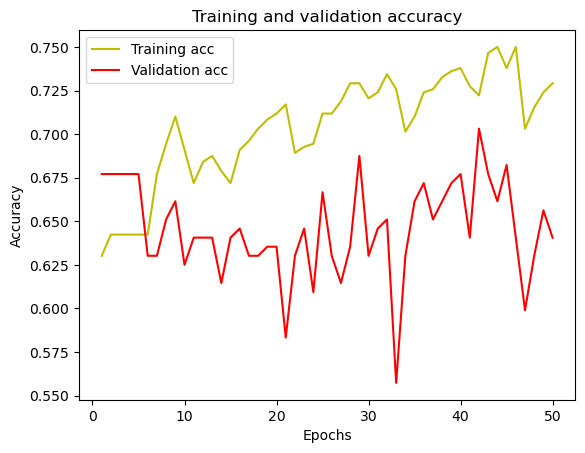

In [37]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [39]:
print("\n----------------classification_report-----------------")
print(classification_report(y_test_class, y_pred_class))
print("\n------------------confusion_matrix--------------------")
print(confusion_matrix(y_test_class, y_pred_class))


----------------classification_report-----------------
              precision    recall  f1-score   support

           0       0.80      0.62      0.70       130
           1       0.46      0.68      0.55        62

    accuracy                           0.64       192
   macro avg       0.63      0.65      0.63       192
weighted avg       0.69      0.64      0.65       192


------------------confusion_matrix--------------------
[[81 49]
 [20 42]]
